# **Task 1:** Linear Regression GD Methods
This notebook implements and compares different gradient descent methods for linear regression.

## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Generate synthetic data

In [2]:
X = np.random.randn(1000, 1)
Y = 4 * X.flatten() - 2 + np.random.normal(0, 15, size=(1000,))

## Plot the data

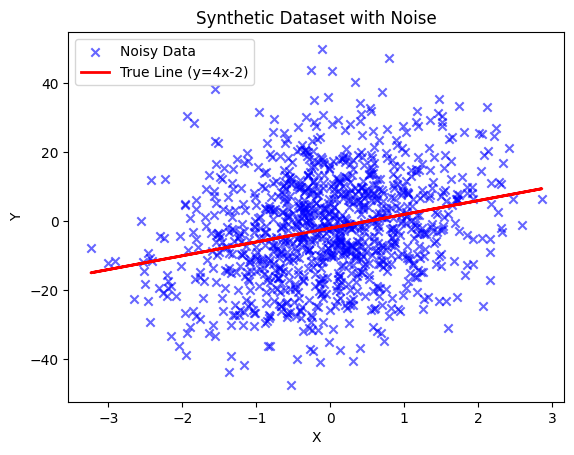

In [3]:
plt.scatter(X, Y, label="Noisy Data", color="blue", alpha=0.6, marker="x")
plt.plot(X, 4*X-2, label="True Line (y=4x-2)", color="red", linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Synthetic Dataset with Noise")
plt.show()

## Split the dataset into training (80%) and testing (20%)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Implement important functions: Cost, MSE, Compute_Gradient

In [5]:
def cost_fun(x, y, w, b):
    m = x.shape[0]
    f_wb = np.dot(x, w) + b
    cost = (1 / (2 * m)) * np.sum((f_wb - y) ** 2)
    return cost

def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_gradient(x,y,w,b):
  m = x.shape[0]
  f_wb = np.dot(x,w) +b
  dj_dw = (1 / m) * np.dot(x.T, (f_wb - y))
  dj_db = (1/m) * np.sum(f_wb -y)
  return dj_dw, dj_db

## Batch Gradient Descent (BGD)

In [6]:
def BGD(x , y , w_in , b_in , alpha , iterations , cost_fun , compute_gradient):
    w = w_in
    b = b_in
    j_history = []
    w_b_history = []

    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        j_history.append(cost_fun(x, y, w, b))
        w_b_history.append([w, b])

    return w, b, j_history, w_b_history

## Stochastic Gradient Descent (SGD)


In [7]:
def SGD(x, y, w_in, b_in, alpha, iterations, cost_fun, compute_gradient):
    w = w_in
    b = b_in
    j_history = []
    w_b_history = []
    m = x.shape[0]

    for i in range(iterations):
        random_index = np.random.randint(m)
        xi = x[random_index]
        yi = y[random_index]


        dj_dw, dj_db = compute_gradient(np.array([xi]), np.array([yi]), w, b)


        w -= alpha * dj_dw
        b -= alpha * dj_db


        cost = cost_fun(x, y, w, b)
        j_history.append(cost)
        w_b_history.append([w, b])

    return w, b, j_history, w_b_history


## Mini-Batch Gradient Descent (MBGD)

In [8]:
def MBGD (x , y , w_in , b_in , alpha , iterations , cost_fun , compute_gradient, batch_size=32):
    w = w_in
    b = b_in
    j_history = []
    w_b_history = []
    m = x.shape[0]

    for i in range(iterations):
        permutation = np.random.permutation(m)
        x_shuffled = x[permutation]
        y_shuffled = y[permutation]

        for j in range(0, m, batch_size):
            x_batch = x_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]

            if len(x_batch) < batch_size:
                continue

            dj_dw, dj_db = compute_gradient(x_batch, y_batch, w, b)
            w -= alpha * dj_dw
            b -= alpha * dj_db
            j_history.append(cost_fun(x, y, w, b))
            w_b_history.append([w, b])

    return w, b, j_history, w_b_history


## Training Different Methods Models and Evaluate with MSE

In [9]:
w_BGD, b_BGD, j_his_BGD, w_b_BGD = BGD(
    x_train,
    y_train,
    w_in=np.zeros((1,)),
    b_in=0.0,
    alpha=0.8,
    iterations=1000,
    cost_fun=cost_fun,
    compute_gradient=compute_gradient
)

In [10]:
y_pred_BGD = w_BGD * x_test + b_BGD
mse_BGD = MSE(y_test, y_pred_BGD)
print(f"Mean Squared Error (MSE) for BGD: {mse_BGD}")

Mean Squared Error (MSE) for BGD: 255.61709970073943


In [11]:
w_SGD, b_SGD, j_his_SGD, w_b_SGD = SGD(
    x_train,
    y_train,
    w_in=np.zeros((1,)),
    b_in=0.0,
    alpha=0.8,
    iterations=1000,
    cost_fun=cost_fun,
    compute_gradient=compute_gradient
)

In [12]:
y_pred_SGD = w_SGD * x_test + b_SGD
mse_SGD = MSE(y_test, y_pred_SGD)
print(f"Mean Squared Error (MSE) for SGD: {mse_SGD}")

Mean Squared Error (MSE) for SGD: 289.2821948895616


In [13]:
w_MBGD, b_MBGD, j_his_MBGD, w_b_MBGD = MBGD(
    x_train,
    y_train,
    w_in=np.zeros((1,)),
    b_in=0.0,
    alpha=0.8,
    iterations=1000,
    cost_fun=cost_fun,
    compute_gradient=compute_gradient
)

In [14]:
y_pred_MBGD = w_MBGD * x_test + b_MBGD
mse_MBGD = MSE(y_test, y_pred_MBGD)
print(f"Mean Squared Error (MSE) for MBGD: {mse_MBGD}")

Mean Squared Error (MSE) for MBGD: 286.1311734541804


In [15]:
model = LinearRegression()
model.fit(x_train, y_train)
w = model.coef_[0]
b = model.intercept_
y_pred_sklearn = w * x_test + b

In [16]:
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f"Mean Squared Error (MSE) for Bulit in GD: {mse_sklearn}")

Mean Squared Error (MSE) for Bulit in GD: 222.38264419204646


## Plotting the Decision Boundries to compare

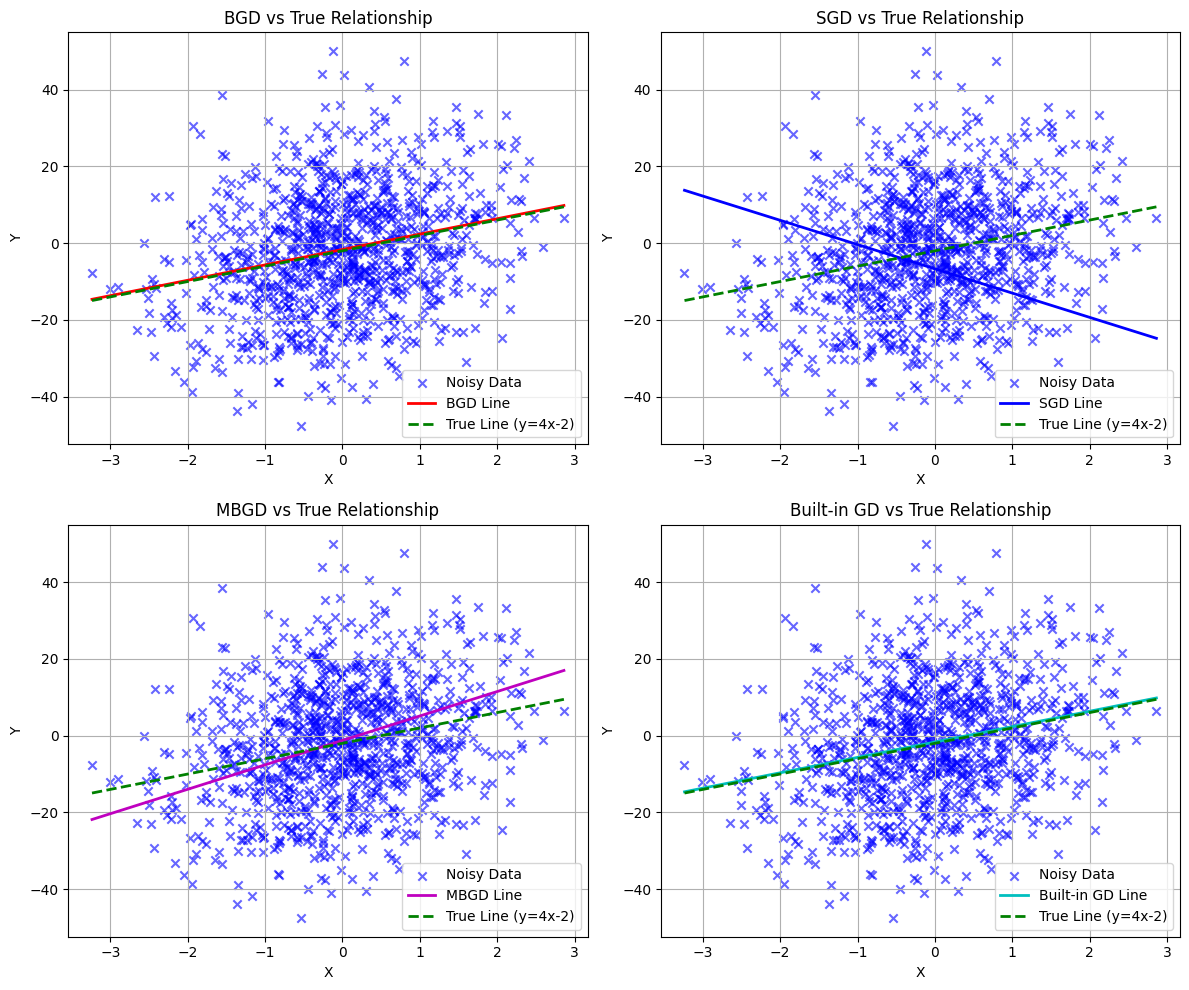

In [17]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
titles = ["BGD vs True Relationship", "SGD vs True Relationship",
          "MBGD vs True Relationship", "Built-in GD vs True Relationship"]
weights = [(w_BGD, b_BGD), (w_SGD, b_SGD), (w_MBGD, b_MBGD), (w, b)]
colors = ['r-', 'b-', 'm-', 'c-']
labels = ["BGD Line", "SGD Line", "MBGD Line", "Built-in GD Line"]

x_line = np.array([np.min(X), np.max(X)])
y_true_line = 4 * x_line - 2

for ax, (w_i, b_i), title, color, label in zip(axes.flat, weights, titles, colors, labels):
    ax.scatter(X, Y, label="Noisy Data", color="blue", alpha=0.6, marker="x")
    y_line = w_i * x_line + b_i
    ax.plot(x_line, y_line, color, label=label, linewidth=2)
    ax.plot(x_line, y_true_line, 'g--', label="True Line (y=4x-2)", linewidth=2)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()


## Cost Function Convergence Plots


In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=3, cols=1, subplot_titles=["Cost for BGD", "Cost for SGD", "Cost for MBGD"])

costs = [j_his_BGD, j_his_SGD, j_his_MBGD]
colors = ['red', 'blue', 'magenta']
methods = ["BGD", "SGD", "MBGD"]


for i, (J_hist, color, method) in enumerate(zip(costs, colors, methods), start=1):
    fig.add_trace(
        go.Scatter(y=J_hist, mode='lines', name=f"Cost {method}", line=dict(color=color)),
        row=i, col=1
    )


fig.update_layout(
    title_text="Cost Comparison for Different Optimization Methods",
    height=800,
    showlegend=False
)

fig.show()


## Parameter Convergence Plots


In [19]:
fig = go.Figure()
methods = ["BGD", "SGD", "MBGD", "Scikit-Learn"]
w_values = [float(w_BGD), float(w_SGD), float(w_MBGD), float(w)]
b_values = [float(b_BGD), float(b_SGD), float(b_MBGD), float(b)]


fig.add_trace(go.Bar(
    x=methods,
    y=w_values,
    name="w",
    marker_color="red",
    text=[f"{w:.4f}" for w in w_values],
    textposition="auto"
))


fig.add_trace(go.Bar(
    x=methods,
    y=b_values,
    name="b",
    marker_color="green",
    text=[f"{b:.4f}" for b in b_values],
    textposition="auto"
))


fig.update_layout(
    title="Final w and b Comparison for Different Methods",
    xaxis_title="Optimization Methods",
    yaxis_title="Parameter Values",
    barmode="group",
    hovermode="x",
)


fig.show()


<ipython-input-19-fbbda799399b>:3: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



## Final Model Comparison: Mean Squared Error (MSE)

Final Model Comparison:
Batch Gradient Descent (BGD) MSE: 255.6171
Stochastic Gradient Descent (SGD) MSE: 289.2822
Mini-Batch Gradient Descent (MBGD) MSE: 286.1312
Scikit-Learn Linear Regression MSE: 222.3826



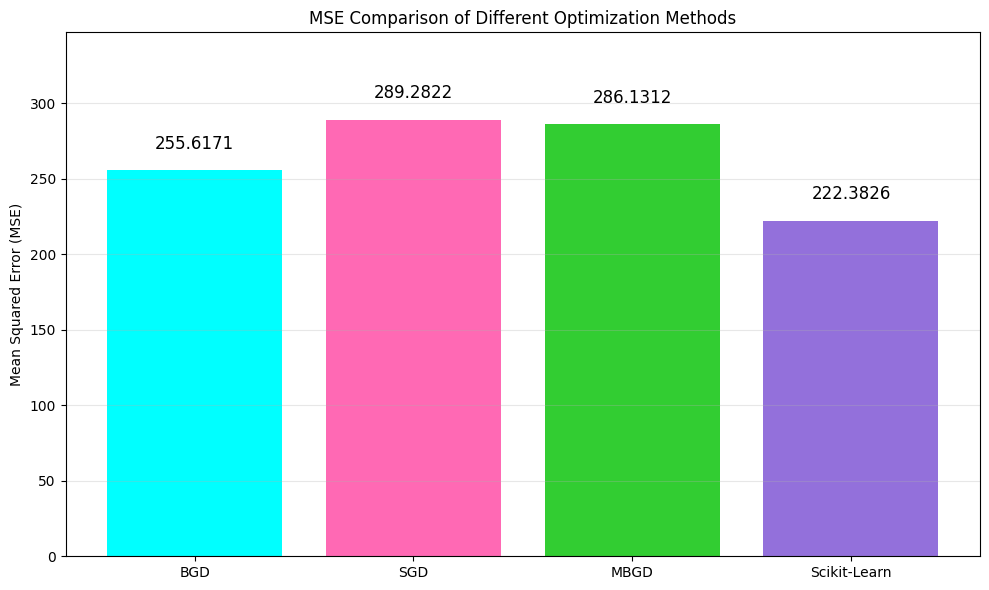

In [20]:
print("Final Model Comparison:")
print("=" * 50)
print(f"Batch Gradient Descent (BGD) MSE: {mse_BGD:.4f}")
print(f"Stochastic Gradient Descent (SGD) MSE: {mse_SGD:.4f}")
print(f"Mini-Batch Gradient Descent (MBGD) MSE: {mse_MBGD:.4f}")
print(f"Scikit-Learn Linear Regression MSE: {mse_sklearn:.4f}")
print("=" * 50 + "\n")


plt.figure(figsize=(10, 6))
methods = ['BGD', 'SGD', 'MBGD', 'Scikit-Learn']
mse_values = [mse_BGD, mse_SGD, mse_MBGD, mse_sklearn]
colors = ['#00FFFF', '#FF69B4', '#32CD32', '#9370DB']

plt.bar(methods, mse_values, color=colors)
plt.title('MSE Comparison of Different Optimization Methods')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim([0, max(mse_values) * 1.2])
plt.grid(True, alpha=0.3, axis='y')


for i, v in enumerate(mse_values):
    plt.text(i, v + (max(mse_values) * 0.05), f'{v:.4f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# **Task 2:** Logistic Regression GD Methods
This notebook implements and compares different gradient descent methods for logistic regression.

## Generate synthetic binary classification data

In [21]:
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=42,
    n_clusters_per_class=1
)

## Plot the Data

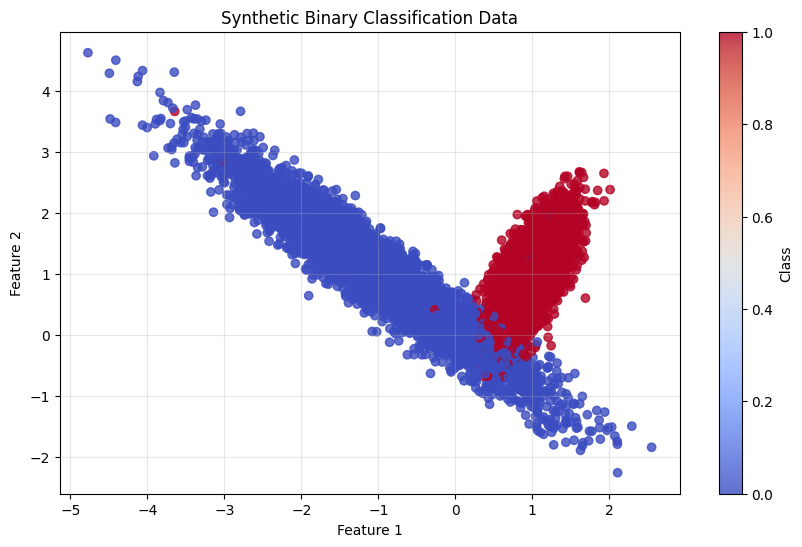

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.8)
plt.title('Synthetic Binary Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True, alpha=0.3)
plt.show()

## Split the dataset into training (80%) and testing (20%)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the features & Add bias column

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

## Implement important functions: Sigmoid, Cost, Predict, Accuracy

In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-15
    cost = -1/m * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5

def calculate_accuracy(X, y, theta):
    return np.mean(predict(X, theta) == y)

## Implement Batch Gradient Descent (BGD)

In [26]:
def batch_gradient_descent(X, y, learning_rate=0.1, num_iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_hist = []
    acc_hist = []

    for i in range(num_iterations):
        z = X @ theta
        h = sigmoid(z)
        gradient = X.T @ (h - y) / m
        theta -= learning_rate * gradient

        if i % 10 == 0:
            cost_hist.append(compute_cost(X, y, theta))
            acc_hist.append(calculate_accuracy(X, y, theta))

    return theta, cost_hist, acc_hist

## Implement Stochastic Gradient Descent (SGD)

In [27]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
  m, n = X.shape
  theta = np.zeros(n)
  cost_hist = []
  acc_hist = []

  for i in range(num_iterations):
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for j in range(m):
      xi = X_shuffled[j:j+1]
      yi = y_shuffled[j:j+1]

      z = xi @ theta
      h = sigmoid(z)
      gradient = xi.T @ (h - yi)
      theta = theta - learning_rate * gradient

    if i % 10 == 0:
      cost = compute_cost(X, y, theta)
      cost_hist.append(cost)
      acc_hist.append(calculate_accuracy(X, y, theta))

  return theta, cost_hist, acc_hist

## Implement Mini-Batch Gradient Descent (MBGD)

In [28]:
def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.1, num_iterations=1000):
  m, n = X.shape
  theta = np.zeros(n)
  cost_hist = []
  acc_hist = []

  for i in range(num_iterations):
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for j in range(0, m, batch_size):
      X_batch = X_shuffled[j:j+batch_size]
      y_batch = y_shuffled[j:j+batch_size]

      z = X_batch @ theta
      h = sigmoid(z)
      gradient = X_batch.T @ (h - y_batch) / len(y_batch)
      theta = theta - learning_rate * gradient

    if i % 10 == 0:
      cost = compute_cost(X, y, theta)
      cost_hist.append(cost)
      acc_hist.append(calculate_accuracy(X, y, theta))

  return theta, cost_hist, acc_hist

## Train with all Gradient Descent Methods

In [29]:
print("Training Batch Gradient Descent...")
theta_bgd, cost_history_bgd, acc_history_bgd = batch_gradient_descent(
    X_train_bias, y_train, learning_rate=0.1, num_iterations=1000)

print("Training Stochastic Gradient Descent...")
theta_sgd, cost_history_sgd, acc_history_sgd = stochastic_gradient_descent(
    X_train_bias, y_train, learning_rate=0.01, num_iterations=1000)

print("Training Mini-Batch Gradient Descent...")
theta_mbgd, cost_history_mbgd, acc_history_mbgd = mini_batch_gradient_descent(
    X_train_bias, y_train, batch_size=32, learning_rate=0.1, num_iterations=1000)

Training Batch Gradient Descent...
Training Stochastic Gradient Descent...
Training Mini-Batch Gradient Descent...


## Plot training cost and accuracy histories

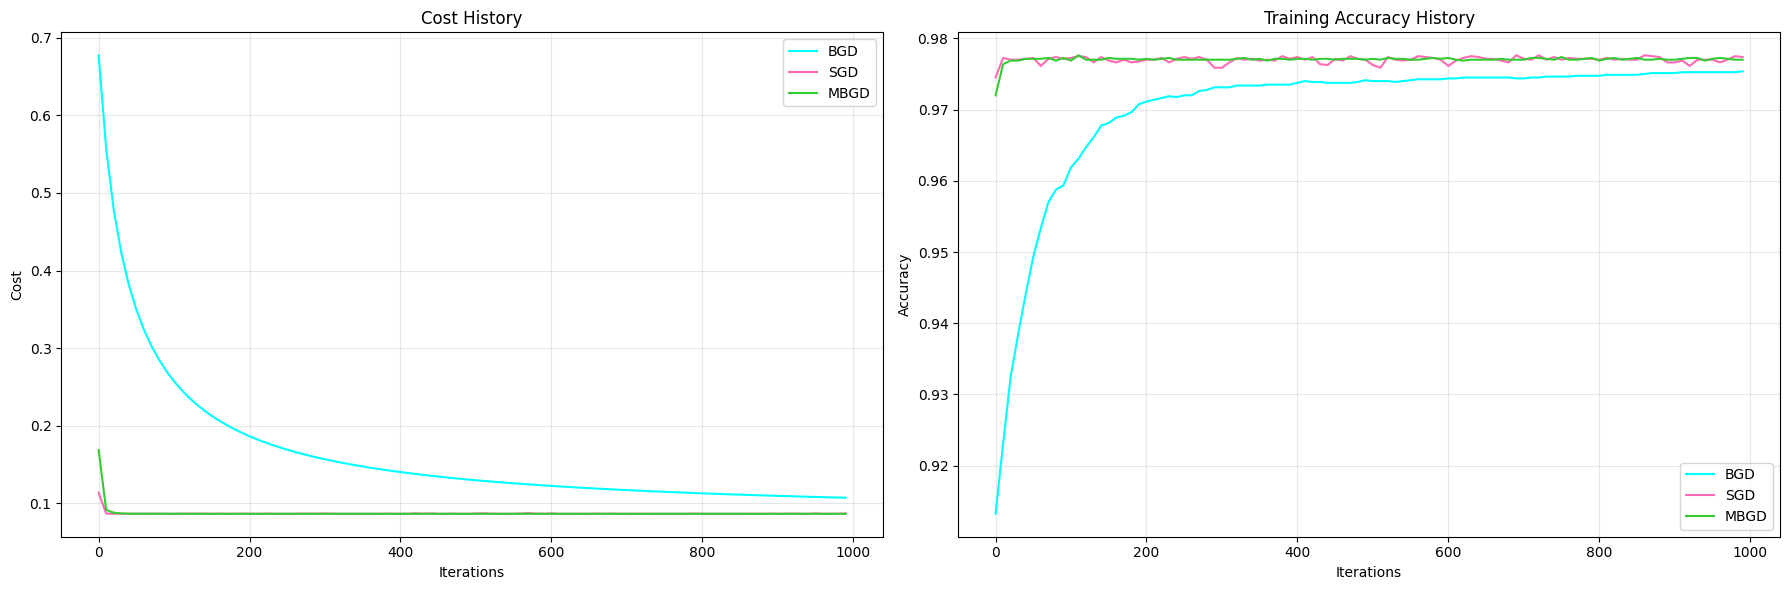

In [30]:
plt.figure(figsize=(18, 6))

# Cost History
plt.subplot(1, 2, 1)
plt.plot(range(0, 1000, 10), cost_history_bgd, label='BGD', color='#00FFFF')
plt.plot(range(0, 1000, 10), cost_history_sgd, label='SGD', color='#FF69B4')
plt.plot(range(0, 1000, 10), cost_history_mbgd, label='MBGD', color='#32CD32')
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, alpha=0.3)

# Accuracy History
plt.subplot(1, 2, 2)
plt.plot(range(0, 1000, 10), acc_history_bgd, label='BGD', color='#00FFFF')
plt.plot(range(0, 1000, 10), acc_history_sgd, label='SGD', color='#FF69B4')
plt.plot(range(0, 1000, 10), acc_history_mbgd, label='MBGD', color='#32CD32')
plt.title('Training Accuracy History')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Evaluate all GD Methods on test data

In [31]:
print("\nTest Accuracy Results:")

bgd_accuracy = calculate_accuracy(X_test_bias, y_test, theta_bgd)
print(f"Batch Gradient Descent: {bgd_accuracy:.4f}")

sgd_accuracy = calculate_accuracy(X_test_bias, y_test, theta_sgd)
print(f"Stochastic Gradient Descent: {sgd_accuracy:.4f}")

mbgd_accuracy = calculate_accuracy(X_test_bias, y_test, theta_mbgd)
print(f"Mini-Batch Gradient Descent: {mbgd_accuracy:.4f}")


Test Accuracy Results:
Batch Gradient Descent: 0.9805
Stochastic Gradient Descent: 0.9830
Mini-Batch Gradient Descent: 0.9820


## Analyze the convergence speed for all Gradient Descent Methods

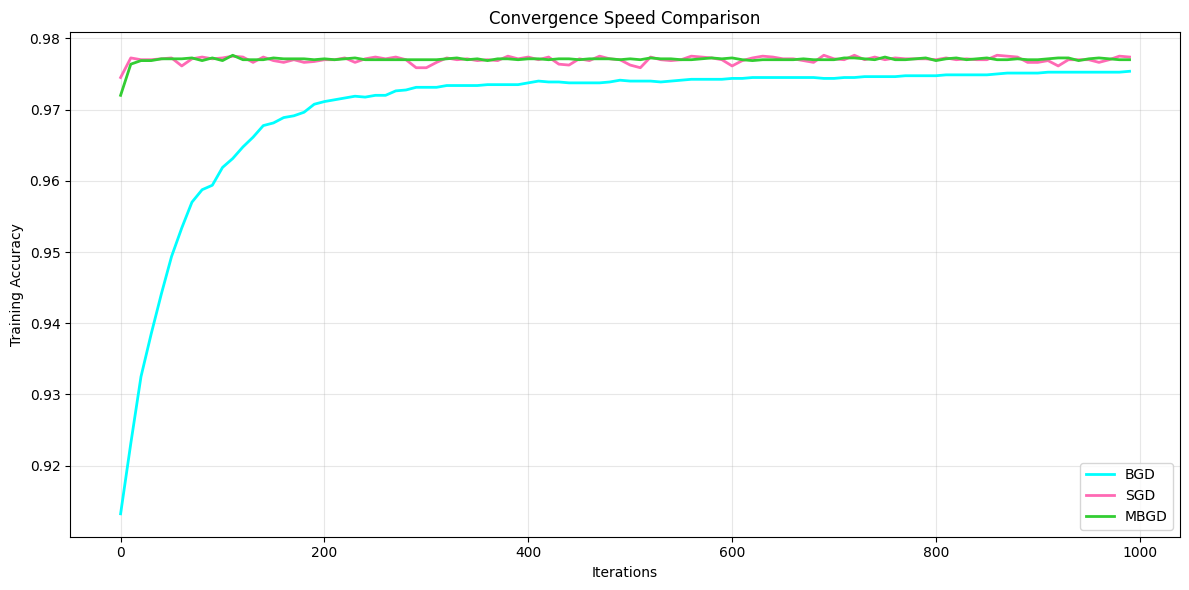

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(range(0, 1000, 10), acc_history_bgd,
         label='BGD', linewidth=2, color='#00FFFF')
plt.plot(range(0, 1000, 10), acc_history_sgd,
         label='SGD', linewidth=2, color='#FF69B4')
plt.plot(range(0, 1000, 10), acc_history_mbgd,
         label='MBGD', linewidth=2, color='#32CD32')
plt.title('Convergence Speed Comparison')
plt.xlabel('Iterations')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Train & Evaluate Scikit-Learn's Logistic Regression

In [33]:
print("\nTraining Scikit-Learn's Logistic Regression...")
sklearn_model = LogisticRegression(
    solver='lbfgs', max_iter=1000, random_state=42)
sklearn_model.fit(X_train_scaled, y_train)
sklearn_pred = sklearn_model.predict(X_test_scaled)
sklearn_accuracy = accuracy_score(y_test, sklearn_pred)
print(f"Scikit-Learn Logistic Regression: {sklearn_accuracy:.4f}")


Training Scikit-Learn's Logistic Regression...
Scikit-Learn Logistic Regression: 0.9825


## Decision boundaries visualization

<Figure size 1500x1000 with 0 Axes>

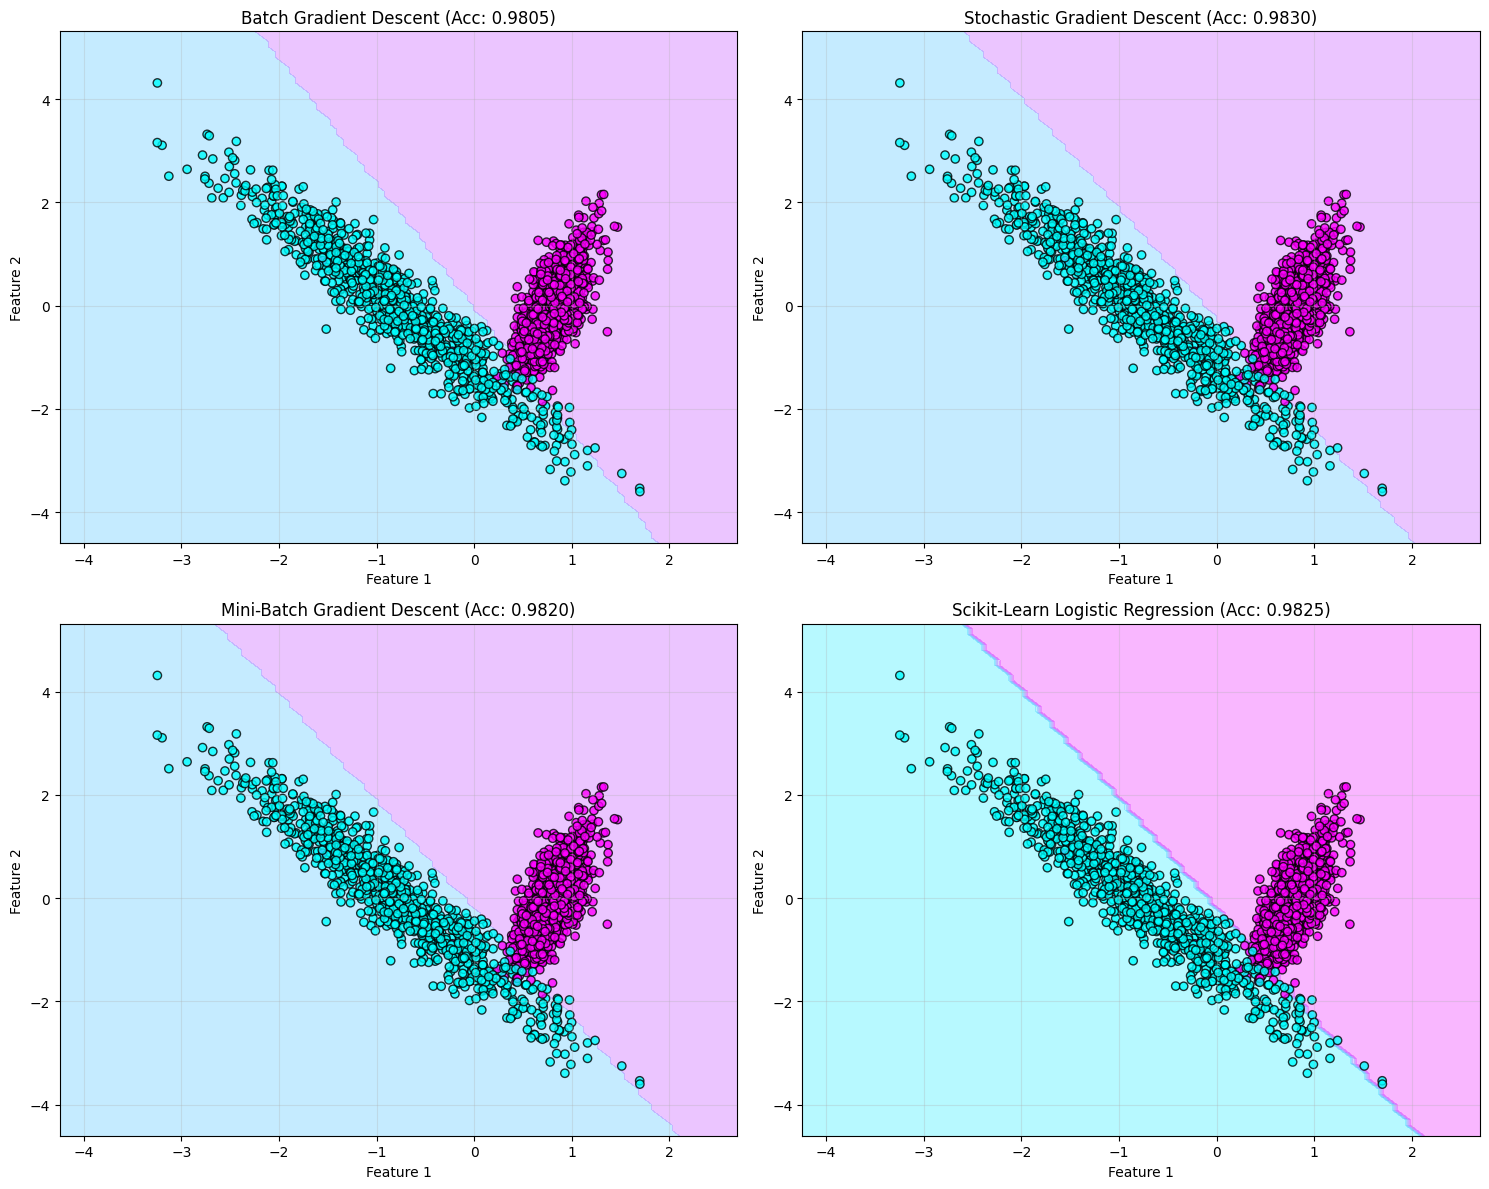

In [34]:
plt.figure(figsize=(15, 10))

# Create a mesh grid
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Function to plot decision boundary
def plot_decision_boundary(ax, theta, title):
  mesh_points = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
  Z = predict(mesh_points, theta)
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=0.3, cmap='cool')
  ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
             c=y_test, cmap='cool', edgecolor='k', alpha=0.8)
  ax.set_title(title)
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
  ax.grid(True, alpha=0.3)

# Function to plot sklearn decision boundary
def plot_sklearn_decision_boundary(ax, model, title):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=0.3, cmap='cool')
  ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
             c=y_test, cmap='cool', edgecolor='k', alpha=0.8)
  ax.set_title(title)
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
  ax.grid(True, alpha=0.3)


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot each model's decision boundary
plot_decision_boundary(
    axes[0, 0], theta_bgd, f'Batch Gradient Descent (Acc: {bgd_accuracy:.4f})')
plot_decision_boundary(
    axes[0, 1], theta_sgd, f'Stochastic Gradient Descent (Acc: {sgd_accuracy:.4f})')
plot_decision_boundary(
    axes[1, 0], theta_mbgd, f'Mini-Batch Gradient Descent (Acc: {mbgd_accuracy:.4f})')
plot_sklearn_decision_boundary(
    axes[1, 1], sklearn_model, f'Scikit-Learn Logistic Regression (Acc: {sklearn_accuracy:.4f})')
plt.tight_layout()
plt.show()

## Compare all models' accuracy

Final Model Comparison:
Batch Gradient Descent (BGD): 0.9805
Stochastic Gradient Descent (SGD): 0.9830
Mini-Batch Gradient Descent (MBGD): 0.9820
Scikit-Learn Logistic Regression: 0.9825



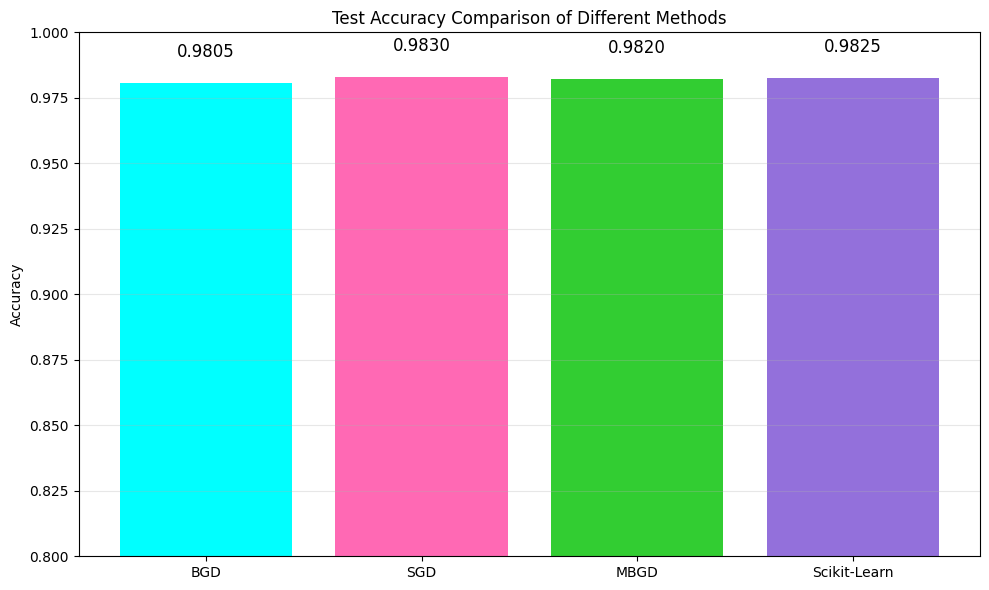

In [35]:
print("Final Model Comparison:")
print("=" * 50)
print(f"Batch Gradient Descent (BGD): {bgd_accuracy:.4f}")
print(f"Stochastic Gradient Descent (SGD): {sgd_accuracy:.4f}")
print(f"Mini-Batch Gradient Descent (MBGD): {mbgd_accuracy:.4f}")
print(f"Scikit-Learn Logistic Regression: {sklearn_accuracy:.4f}")
print("=" * 50 + "\n")

plt.figure(figsize=(10, 6))
methods = ['BGD', 'SGD', 'MBGD', 'Scikit-Learn']
accuracies = [bgd_accuracy, sgd_accuracy, mbgd_accuracy, sklearn_accuracy]
colors = ['#00FFFF', '#FF69B4', '#32CD32', '#9370DB']
plt.bar(methods, accuracies, color=colors)
plt.title('Test Accuracy Comparison of Different Methods')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.grid(True, alpha=0.3, axis='y')

# Add accuracy values on top of bars
for i, v in enumerate(accuracies):
  plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()